In [1]:
# This script create initial profiles for Alk, DIC, DIN, DSi, DFe, O2
# It needs the module py_f2recom to be installed
# https://gitlab.dkrz.de/a270114/py_f2recom

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import sys
import os
home = os.path.expanduser("~")

sys.path.append(home+ '/pyfesom2/codes/py_f2recom_develop/modules/')
sys.path.append(home+ '/pyfesom2/codes/py_f2recom_develop/modules/pyfesom2')
import pyfesom2 as pf
sys.path.append(home+ '/pyfesom2/codes/py_f2recom_develop/modules/SkillMetrics/')
import skill_metrics as sm
sys.path.append(home+ '/pyfesom2/codes/py_f2recom_develop/modules/cmocean-master/')
import cmocean as cmo

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import pandas as pd

Autosaving every 5 seconds


In [3]:
#    Only modify parameters and paths in this cell       #
#  In principle, you don't have to modify anything else  #


# run specification -------------------------------------------------------------------------------------   
runid      =  'fesom'
simu_name = 'A'

# defines paths ----------------------------------------------------------------------------------------- 

#resultpath = '/work/ollie/ogurses/output_f2r2/spinup_1800_1850/A'
#resultpath ='/work/ollie/ogurses/output_f2r2/fesom2.1_recom_New_Initial_Conditions/'+simu_name+'/'
#resultpath ='/work/ollie/loziel/model_output/fesom2.1_recom/'+simu_name+'/'
#resultpath = '/scratch/projects/hbk00083/model_outputs/fesom2.1_recom'+simu_name+'/'

meshpath = '/work/ollie/loziel/mesh/farc/'
#meshpath = '/work/ollie/clidyn/FESOM2/meshes/farc/'
#meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'
#meshpath = '/scratch/usr/hbkoziel/mesh/farc'

#savepath = home+'/pyfesom2/codes/py_f2recom/outputs/'+simu_name+'/'

# period of analysis ------------------------------------------------------------------------------------
first_year_maps = 2012
first_year = 1958
last_year  = 2021
    
years = np.arange(first_year,last_year+1,1)
years_last10 = np.arange(first_year_maps,last_year+1,1)

# specification of analysis ------------------------------------------------------------------------------------

layerwise = False
depths = (0,50,200,1000,2000) # If layerwise is True, you can define depths here, by defaut: (0,50,200,1000,2000,4000)
depth_limit = 50
mapproj = 'rob'
#Map projection. Options are Mercator (merc), Plate Carree (pc),
#North Polar Stereo (np), South Polar Stereo (sp),  Robinson (rob)
#Robinson projection is quite time consuming.

In [4]:
# initialization file specifications -----------------------------------------------------------

evalpath      = '/work/ollie/projects/MarESys/evaluation/'
evalpath2      = '/work/ollie/ogurses/input/corrected_input/'

#evalpath      = '/scratch/usr/hbkoziel/evaluation/'
#evalpath2      = '/scratch/usr/hbkoziel/corrected_input/'

ncfileAlk                = evalpath2+'GLODAPv2.2016b.TAlk_mmol.nc'
ncfileDIC                = evalpath2+'GLODAPv2.2016b.TCO2_mmol.nc'
ncfileDSi                = evalpath2+'woa13_all_i00_01_fesom2.nc'
ncfileDIN                = evalpath2+'woa13_all_n00_01_fesom2.nc'
ncfileDO2                = evalpath2+'woa18_all_o00_01_mmol_fesom2.nc'
ncfileDFe                = evalpath2+'fe_pisces_opa_eq_init_3D_changed_name.nc' 
ncfileNPPTotalGlobal     = evalpath+'fesom.initial.mesh.diag.nc'
ncfileCO2fluxTotalGlobal = evalpath+'fesom.initial.mesh.diag.nc'
ncfileTemp               = evalpath2+'woa18_decav_t00_01_fesom2.nc'
ncfileSal                = evalpath2+'woa18_decav_s00_01_fesom2.nc'
ncfilePHC3               = evalpath2+'phc3.0_annual.nc'      
#ncfilepCO2               = evalpath+'SOCATv6_tracks_gridded_monthly.nc'
ncfilepCO2               = '/home/ollie/loziel/SOCATv2020_tracks_gridded_monthly.nc'
ncfileCO2f               = '/home/ollie/loziel/dataset_CO2_Chauetal2020.nc'
ncfileMLD                = evalpath+'mld_DR003.nc'
matfileChlsurf           = evalpath+'climatology_annual_chl_1deg_OCCCI_2012_2015.mat'
txtfileCO2flux           = evalpath+'CO2_flux2015_Takahashietal2009_original.txt'
ncfileMaredat            = evalpath+'MarEDat20120716Diatoms.nc'
ncfileJohnson2013        = evalpath+'Johnson2013_MEAN_1x1_Chl_mg_m3.npy'
matfileNPPvgpm           = evalpath+'VGPM_CLIM.mat'
matfileNPPcpbm           = evalpath+'CBPM_CLIM.mat'
matfileMLD               = evalpath+'GlobalML_Climato_1970_2018.mat'
    
# mesh initialization -----------------------------------------------------------
mesh = pf.load_mesh(meshpath)

/work/ollie/loziel/mesh/farc/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/loziel/mesh/farc/pickle_mesh_py3_fesom2


In [5]:
diag = pf.get_meshdiag(mesh,meshdiag=meshpath+'/fesom.mesh.diag.nc', runid=runid)
diag

<xarray.Dataset>
Dimensions:            (nl: 48, nl1: 47, elem_n: 1253306, nod_n: 638387, n3: 3, n2: 2, N: 9, edg_n: 1891970, n4: 4)
Dimensions without coordinates: nl, nl1, elem_n, nod_n, n3, n2, N, edg_n, n4
Data variables: (12/19)
    zbar               (nl) float64 ...
    Z                  (nl1) float64 ...
    elem_area          (elem_n) float64 ...
    nlevels_nod2D      (nod_n) int32 ...
    nlevels            (elem_n) int32 ...
    nod_in_elem2D_num  (nod_n) int32 ...
    ...                 ...
    nod_in_elem2D      (N, nod_n) int32 ...
    edges              (n2, edg_n) int32 ...
    edge_tri           (n2, edg_n) int32 ...
    edge_cross_dxdy    (n4, edg_n) float64 ...
    gradient_sca_x     (n3, elem_n) float64 ...
    gradient_sca_y     (n3, elem_n) float64 ...

In [6]:
!jupyter nbconvert --to=python DO2_profiles_python3.ipynb
!jupyter nbconvert --to=python load_interp_WOA_python3.ipynb
!jupyter nbconvert --to=python load_interp_PISCES_python3.ipynb
from DO2_profiles_python3 import DO2_profile

DO2 = DO2_profile(runid,mesh,ncfileDO2)

[NbConvertApp] Converting notebook DO2_profiles_python3.ipynb to python
[NbConvertApp] Writing 2934 bytes to DO2_profiles_python3.py
[NbConvertApp] Converting notebook load_interp_WOA_python3.ipynb to python
[NbConvertApp] Writing 7205 bytes to load_interp_WOA_python3.py
[NbConvertApp] Converting notebook load_interp_PISCES_python3.ipynb to python
[NbConvertApp] Writing 6684 bytes to load_interp_PISCES_python3.py
***
Loading WOA file: /work/ollie/ogurses/input/corrected_input/woa18_all_o00_01_mmol_fesom2.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)


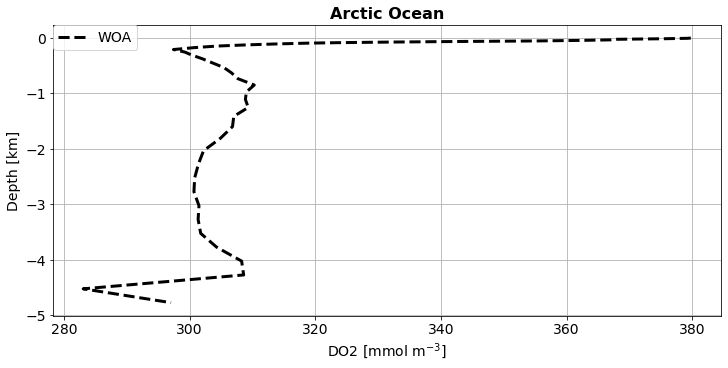

In [7]:
unitsDO2 = 'DO2 [mmol m$^{-3}$]'
fig, axs = plt.subplots(1,1, figsize=(10, 5), facecolor='w', edgecolor='k', constrained_layout=True, sharey=True)

axs.plot(DO2.DO2, DO2.depth/1000,label = 'WOA', color = 'k', lw=3, linestyle = '--')
axs.set_ylabel('Depth [km]',fontsize=14)
axs.set_xlabel(unitsDO2,fontsize=14)
axs.set_title('Arctic Ocean',size=16, weight='bold')
axs.tick_params(labelsize=14)
axs.grid()
axs.legend(loc='best', borderaxespad=0., fontsize=14)

plt.show(block=False)

In [8]:
do2_profile = DO2.DO2
do2_profile.mask[-5:] = False
do2_profile.data[-5:] = do2_profile.data[-6]

In [9]:
do2_profile

masked_array(data=[379.78293029137814, 379.2407854078791,
                   375.52105576150143, 368.03948780010046,
                   367.1176469522656, 362.2870321150034,
                   355.1300175719631, 342.5033178702643,
                   332.29571644493785, 324.28062183516226,
                   318.6524817631948, 314.28548384308516,
                   309.2813592038879, 304.31337247349035,
                   300.77248912313195, 297.40765875686793,
                   299.21296190623235, 300.33035281720794,
                   301.98034669230805, 303.6048614796581,
                   305.44282375339395, 306.6493633232641,
                   307.66419611658836, 310.28172389974117,
                   309.0192147392122, 308.86890369339017,
                   309.31519564458864, 307.0154406239807,
                   306.81385142220637, 304.8946862632289,
                   302.2001202323416, 301.3901458793893,
                   300.79002377186663, 300.6770116991239,
            

In [10]:
df = pd.DataFrame()
df['depths'] = DO2.depth
df.set_index('depths', inplace= True)
df['DO2'] = do2_profile
#df

In [11]:
!jupyter nbconvert --to=python Nutrients_profiles_python3.ipynb
!jupyter nbconvert --to=python load_interp_PISCES_python3.ipynb
!jupyter nbconvert --to=python load_interp_WOA_python3.ipynb
from Nutrients_profiles_python3 import Nut_profile

nut = Nut_profile(runid,mesh,ncfileDSi,ncfileDIN,ncfileDFe)

[NbConvertApp] Converting notebook Nutrients_profiles_python3.ipynb to python
[NbConvertApp] Writing 3044 bytes to Nutrients_profiles_python3.py
[NbConvertApp] Converting notebook load_interp_PISCES_python3.ipynb to python
[NbConvertApp] Writing 6684 bytes to load_interp_PISCES_python3.py
[NbConvertApp] Converting notebook load_interp_WOA_python3.ipynb to python
[NbConvertApp] Writing 7205 bytes to load_interp_WOA_python3.py
***
Loading WOA file: /work/ollie/ogurses/input/corrected_input/woa13_all_n00_01_fesom2.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
***
Loading WOA file: /work/ollie/ogurses/input/corrected_input/woa13_all_i00_01_fesom2.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
***
Depth greater in FESOM (-6125.0) than in PISCES (-5500.0)


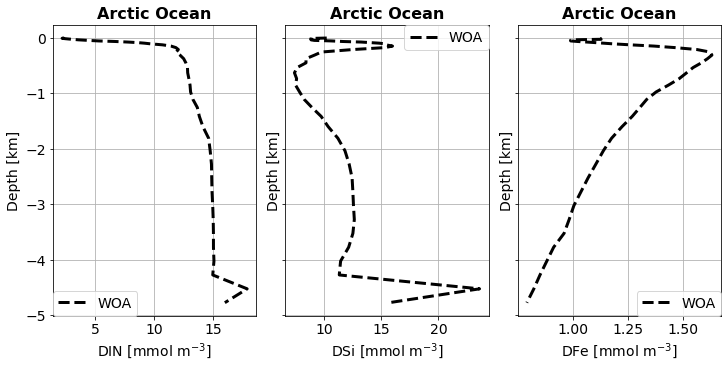

In [12]:
unitsDIN = 'DIN [mmol m$^{-3}$]'
unitsDSi = 'DSi [mmol m$^{-3}$]'
unitsDFe = 'DFe [mmol m$^{-3}$]'

fig, axs = plt.subplots(1,3, figsize=(10, 5), facecolor='w', edgecolor='k', constrained_layout=True, sharey=True)
axs = axs.flatten()

axs[0].plot(nut.DIN, nut.depth/1000,label = 'WOA', color = 'k', lw=3, linestyle = '--')
axs[0].set_ylabel('Depth [km]',fontsize=14)
axs[0].set_xlabel(unitsDIN,fontsize=14)
axs[0].set_title('Arctic Ocean',size=16, weight='bold')
axs[0].tick_params(labelsize=14)
axs[0].grid()
axs[0].legend(loc='best', borderaxespad=0., fontsize=14)

axs[1].plot(nut.DSi, nut.depth/1000,label = 'WOA', color = 'k', lw=3, linestyle = '--')
axs[1].set_ylabel('Depth [km]',fontsize=14)
axs[1].set_xlabel(unitsDSi,fontsize=14)
axs[1].set_title('Arctic Ocean',size=16, weight='bold')
axs[1].tick_params(labelsize=14)
axs[1].grid()
axs[1].legend(loc='best', borderaxespad=0., fontsize=14)

axs[2].plot(nut.DFe, nut.depth/1000,label = 'WOA', color = 'k', lw=3, linestyle = '--')
axs[2].set_ylabel('Depth [km]',fontsize=14)
axs[2].set_xlabel(unitsDFe,fontsize=14)
axs[2].set_title('Arctic Ocean',size=16, weight='bold')
axs[2].tick_params(labelsize=14)
axs[2].grid()
axs[2].legend(loc='best', borderaxespad=0., fontsize=14)

plt.show(block=False)

In [13]:
din_profile = nut.DIN
din_profile.mask[-5:] = False
din_profile.data[-5:] = din_profile.data[-6]

dsi_profile = nut.DSi
dsi_profile.mask[-5:] = False
dsi_profile.data[-5:] = dsi_profile.data[-6]

dfe_profile = nut.DFe
dfe_profile.mask[-5:] = False
dfe_profile.data[-5:] = dfe_profile.data[-6]

In [14]:
df['DIN'] = din_profile
df['DSi'] = dsi_profile
df['DFe'] = dfe_profile

In [15]:
df

,DO2,DIN,DSi,DFe
depths,,,,
-2.5,379.782930,2.366101,10.245277,1.122806
-7.5,379.240785,2.179340,9.284979,1.124155
-15.0,375.521056,2.482704,8.846732,1.125898
-25.0,368.039488,2.984282,8.965226,1.128190
-35.0,367.117647,3.577335,8.873099,0.993958
-45.0,362.287032,4.413914,9.155133,0.989337
-55.0,355.130018,5.283103,10.667380,0.990537
-65.0,342.503318,6.705023,11.649266,1.022655
-75.0,332.295716,7.757021,13.263970,1.063908


In [16]:
!jupyter nbconvert --to=python Carbs_profiles_python3.ipynb
!jupyter nbconvert --to=python load_interp_GLODAP_python3.ipynb
from Carbs_profiles_python3 import Carbs_profile

carbs = Carbs_profile(runid,mesh,ncfileAlk,ncfileDIC)

[NbConvertApp] Converting notebook Carbs_profiles_python3.ipynb to python
[NbConvertApp] Writing 2498 bytes to Carbs_profiles_python3.py
[NbConvertApp] Converting notebook load_interp_GLODAP_python3.ipynb to python
[NbConvertApp] Writing 7264 bytes to load_interp_GLODAP_python3.py
***
Loading GLODAP file: /work/ollie/ogurses/input/corrected_input/GLODAPv2.2016b.TCO2_mmol.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***
***
Loading GLODAP file: /work/ollie/ogurses/input/corrected_input/GLODAPv2.2016b.TAlk_mmol.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***


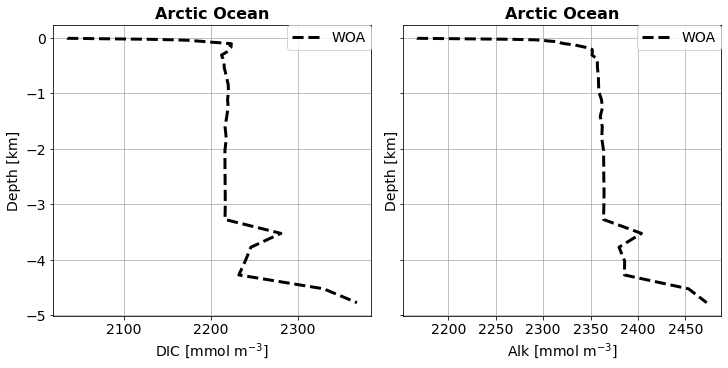

In [17]:
unitsDIC = 'DIC [mmol m$^{-3}$]'
unitsAlk = 'Alk [mmol m$^{-3}$]'

fig, axs = plt.subplots(1,2, figsize=(10, 5), facecolor='w', edgecolor='k', constrained_layout=True, sharey=True)
axs = axs.flatten()

axs[0].plot(carbs.DIC, carbs.depth/1000,label = 'WOA', color = 'k', lw=3, linestyle = '--')
axs[0].set_ylabel('Depth [km]',fontsize=14)
axs[0].set_xlabel(unitsDIC,fontsize=14)
axs[0].set_title('Arctic Ocean',size=16, weight='bold')
axs[0].tick_params(labelsize=14)
axs[0].grid()
axs[0].legend(loc='best', borderaxespad=0., fontsize=14)

axs[1].plot(carbs.Alk, carbs.depth/1000,label = 'WOA', color = 'k', lw=3, linestyle = '--')
axs[1].set_ylabel('Depth [km]',fontsize=14)
axs[1].set_xlabel(unitsAlk,fontsize=14)
axs[1].set_title('Arctic Ocean',size=16, weight='bold')
axs[1].tick_params(labelsize=14)
axs[1].grid()
axs[1].legend(loc='best', borderaxespad=0., fontsize=14)

plt.show(block=False)

In [18]:
dic_profile = carbs.DIC
dic_profile.mask[-5:] = False
dic_profile.data[-5:] = dic_profile.data[-6]

alk_profile = carbs.Alk
alk_profile.mask[-5:] = False
alk_profile.data[-5:] = alk_profile.data[-6]

In [19]:
df['DIC'] = dic_profile
df['Alk'] = alk_profile

In [20]:
df

,DO2,DIN,DSi,DFe,DIC,Alk
depths,,,,,,
-2.5,379.782930,2.366101,10.245277,1.122806,2034.783525,2167.151054
-7.5,379.240785,2.179340,9.284979,1.124155,2035.221872,2167.599557
-15.0,375.521056,2.482704,8.846732,1.125898,2074.678359,2209.259698
-25.0,368.039488,2.984282,8.965226,1.128190,2128.705188,2265.777251
-35.0,367.117647,3.577335,8.873099,0.993958,2157.011552,2291.229232
-45.0,362.287032,4.413914,9.155133,0.989337,2177.671041,2300.901227
-55.0,355.130018,5.283103,10.667380,0.990537,2182.828323,2304.688507
-65.0,342.503318,6.705023,11.649266,1.022655,2191.425974,2312.314465
-75.0,332.295716,7.757021,13.263970,1.063908,2198.426564,2317.360218


In [21]:
df.to_csv('initial_conditions.csv')

In [ ]:
dataset = df.to_xarray()
dataset.to_netcdf('initial_conditions.csv')